### Pregunta 7: Evaluación práctica: Diseño de un controlador PID.

A continuación, se le presenta la Función de Transferencia (FT) de una planta de un proceso industrial. Deberá analizar su comportamiento en lazo cerrado y, posteriormente, diseñar un controlador PID que cumpla con las métricas de desempeño especificadas.

La función de transferencia de la planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$
---
#### Parte 1: Análisis del sistema base (en una celda de Python).

Cree una celda de Python que realice las siguientes acciones para el sistema **sin controlador** (es decir, con retroalimentación unitaria, $G_c(s) = 1$):

1.  Defina la FT de la planta $G_p(s)$.
2.  Obtenga el sistema de la FT de lazo cerrado:
$$G_{LC}(s) = \frac{G_p(s)}{1 + G_p(s)}$$
3.  Imprima en pantalla la $G_{LC}(s)$ y sus polos  (`ct.poles()`).
4.  Genere el mapa de polos y ceros (`ct.pzmap()`).
5.  Grafique la respuesta al escalón unitario (simule por 5 segundos, `T=np.linspace(0, 5, 501)`).
6.  Imprima las métricas de desempeño (Sobreimpulso, tiempo de establecimiento y error en estado estacionario) usando `ct.step_info()` y el valor final de la respuesta.

---

Función de Transferencia del Sistema Base (lazo cerrado):
<TransferFunction>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  --------------
  s^2 + 6 s + 10
Las raíces de s (polos) son:
[-3.+1.j -3.-1.j]


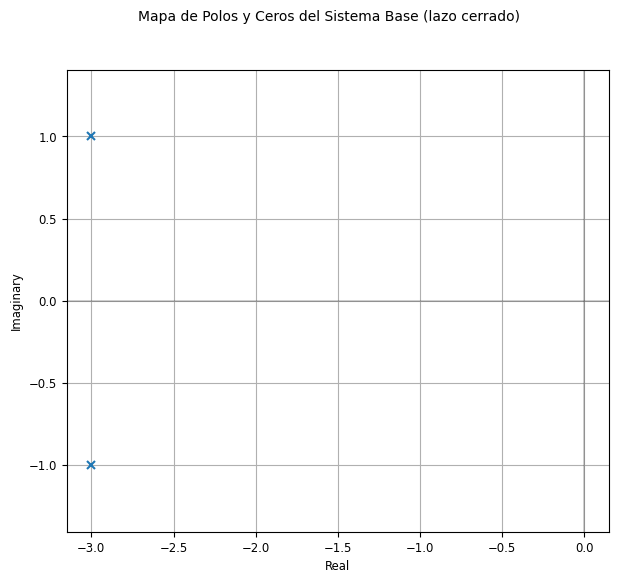

In [ ]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np


# --- Definición de la planta Gp(s). ---
num_p = [5]
den_p = [1, 6, 5]
Gp = ct.tf(num_p, den_p)

# --- Sistema en lazo cerrado con retroalimentación unitaria (sin controlador). ---
# Esto es Gc(s) = 1.
sistema_base = ct.feedback(Gp, 1)
print("Función de Transferencia del Sistema Base (lazo cerrado):")
print(sistema_base)

polos = ct.poles(sistema_base)

print("Las raíces de s (polos) son:")
print(polos)

plt.figure(figsize=(7, 6))
ct.pzmap(sistema_base, title='Mapa de Polos y Ceros del Sistema Base (lazo cerrado)')
plt.grid(True)
plt.show()


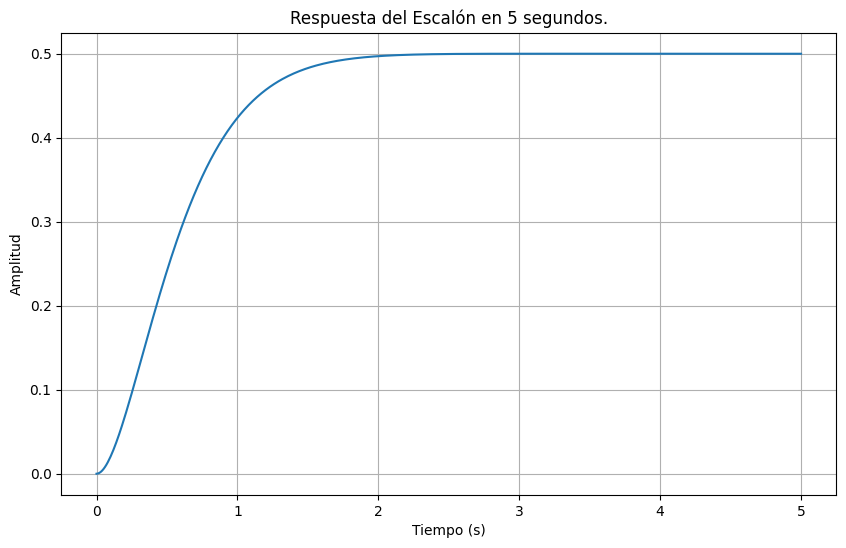

In [8]:
t = np.linspace(0, 5, 501)
t, vout_sistemabase = ct.step_response(sistema_base, T=t)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t, vout_sistemabase)
plt.title('Respuesta del Escalón en 5 segundos.')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

In [9]:
# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema con controlador Proporcional:")
info = ct.step_info(sistema_base)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = vout_sistemabase[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")

Métricas de desempeño del sistema con controlador Proporcional:
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de establecimiento (SettlingTime): 1.67 s
  - Valor final: 0.5000
  - Error en estado estacionario (1 - valor_final): 0.5000


#### Parte 2: Proceso de diseño del PID (en una celda de Markdown).

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.

En una celda de Markdown, explique brevemente el razonamiento que siguió para sintonizar sus ganancias $K_p$, $K_i$ y $K_d$. 

---

#### Justificación

Se propone un valor Kp alto que impactará directamente con el error en estado estacionario, por lo que también ocuparemos un valor de Ki que nos ayude a reducir el error a cero, por ello igualaremos los valores de Ki y Kp. El Kp genera muchas oscilaciones en la respuesta del sistema, en otras palabras nos da un sobreimpulso alto, por lo que es necesario un valor menor al Kp para que éste frene el sobreimpulso que nos da Kp.

#### Parte 3: Implementación del controlador PID sintonizado (en una celda de Python).

Cree una segunda celda de Python que contenga su diseño final. Esta celda debe:

1.  Definir las ganancias $K_p$, $K_i$ y $K_d$ que usted eligió en la Parte 2.
2.  Crear la FT del controlador PID:
$$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$
3.  Calcular la nueva FT de lazo cerrado con el controlador:
$$G_{LC_{PID}}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$
4.  Imprimir la $G_{LC_{PID}}(s)$ y sus nuevos polos.
5.  Generar el mapa de polos y ceros del sistema controlado.
6.  Graficar en una misma figura la respuesta del sistema base (de la Parte 1) y la respuesta de su nuevo sistema con PID sintonizado (simule por 5 segundos).
7.  Imprimir las métricas de desempeño finales para verificar que cumple con los tres requisitos.

---

Tercera Función de Transferencia del sistema de lazon cerrado con controlador Proporcional, Integral-Derivativo:
<TransferFunction>: sys[196]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     15 s^2 + 60 s + 60
  ------------------------
  s^3 + 21 s^2 + 65 s + 60


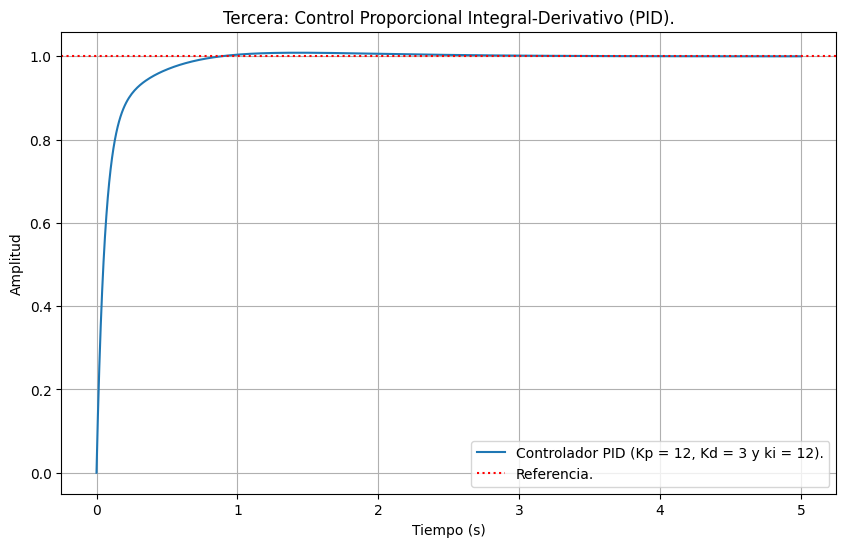

Métricas de desempeño del sistema con controlador Proporcional Integral-Derivativo:
  - Sobreimpulso (Overshoot): 0.87%
  - Tiempo de establecimiento (SettlingTime): 0.60 s
  - Valor final: 1.0000
  - Error en estado estacionario (1 - valor_final): -0.0000


In [35]:
# --- Parámetros del controlador Proporcional-Derivativo. ---
kp_pid = 12
ki_pid = 12
kd_pid = 3

# --- Creación del controlador PID. ---
# El numerador es [Kd, Kp y Ki].
Gc_PID = ct.tf([kd_pid, kp_pid, ki_pid], [0,1,0])

# --- Sistema en lazo cerrado con controlador PID. ---
sistema_PID = ct.feedback(Gc_PID * Gp, 1)
print("Tercera Función de Transferencia del sistema de lazon cerrado con controlador Proporcional, Integral-Derivativo:")
print(sistema_PID)

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 5, 501)
t, y_PID = ct.step_response(sistema_PID, T=t)

plt.figure(figsize=(10, 6))
plt.plot(t, y_PID, label=f"Controlador PID (Kp = {kp_pid}, Kd = {kd_pid} y ki = {ki_pid}).")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Tercera: Control Proporcional Integral-Derivativo (PID).")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema con controlador Proporcional Integral-Derivativo:")
info = ct.step_info(sistema_PID)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_PID[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")



#### Entrega:

Comparta el enlace de su notebook en su repositorio de GitHub, asegurándose de que los resultados de la ejecución de las celdas (gráficas, impresiones) sean visibles.